# Data Loading and Preprocessing
Dataset: Time Series Room Temperature Data in January

Source: https://www.kaggle.com/datasets/vitthalmadane/ts-temp-1

In [3]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Dataset source:
file_path = '/content/drive/MyDrive/Colab Notebooks/MLTempDataset-January.csv'

df = pd.read_csv(file_path)

print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0  Datetime1  DAYTON_MW             Datetime
0           0          0     20.867  2022-01-04 00:00:00
1           1          1     21.000  2022-01-04 01:00:00
2           2          2     20.867  2022-01-04 02:00:00
3           3          3     20.650  2022-01-04 03:00:00
4           4          4     20.400  2022-01-04 04:00:00


Pre-processing data

In [4]:
# Rename columns
df = df.rename(columns={'Datetime1': 'Time', 'DAYTON_MW': 'Temperature'})

# Drop first column
df = df.iloc[:, 2:]

print(df.head())

   Temperature             Datetime
0       20.867  2022-01-04 00:00:00
1       21.000  2022-01-04 01:00:00
2       20.867  2022-01-04 02:00:00
3       20.650  2022-01-04 03:00:00
4       20.400  2022-01-04 04:00:00


# Exploratory Data
Visualize the relationship between 'Hour' and 'Temperature' in 2022-01-05

In [5]:
filtered_df = df[df['Datetime'].str.contains("2022-01-05")]
filtered_df['Datetime'] = pd.to_datetime(filtered_df['Datetime'])
filtered_df['Hour'] = filtered_df['Datetime'].dt.hour
print(filtered_df)

    Temperature            Datetime  Hour
24       21.333 2022-01-05 00:00:00     0
25       20.933 2022-01-05 01:00:00     1
26       20.567 2022-01-05 02:00:00     2
27       20.250 2022-01-05 03:00:00     3
28       20.100 2022-01-05 04:00:00     4
29       15.667 2022-01-05 05:00:00     5
30       19.167 2022-01-05 06:00:00     6
31       14.100 2022-01-05 07:00:00     7
32       14.050 2022-01-05 08:00:00     8
33       13.467 2022-01-05 09:00:00     9
34       11.400 2022-01-05 10:00:00    10
35        9.900 2022-01-05 11:00:00    11
36        9.833 2022-01-05 12:00:00    12
37       10.000 2022-01-05 13:00:00    13
38       13.033 2022-01-05 14:00:00    14
39        9.333 2022-01-05 15:00:00    15
40       12.700 2022-01-05 16:00:00    16
41       12.733 2022-01-05 17:00:00    17
42       15.733 2022-01-05 18:00:00    18
43       16.033 2022-01-05 19:00:00    19
44       16.033 2022-01-05 20:00:00    20
45       16.100 2022-01-05 21:00:00    21
46       12.950 2022-01-05 22:00:0

<ipython-input-5-b3355c55e543>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Datetime'] = pd.to_datetime(filtered_df['Datetime'])
<ipython-input-5-b3355c55e543>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Hour'] = filtered_df['Datetime'].dt.hour


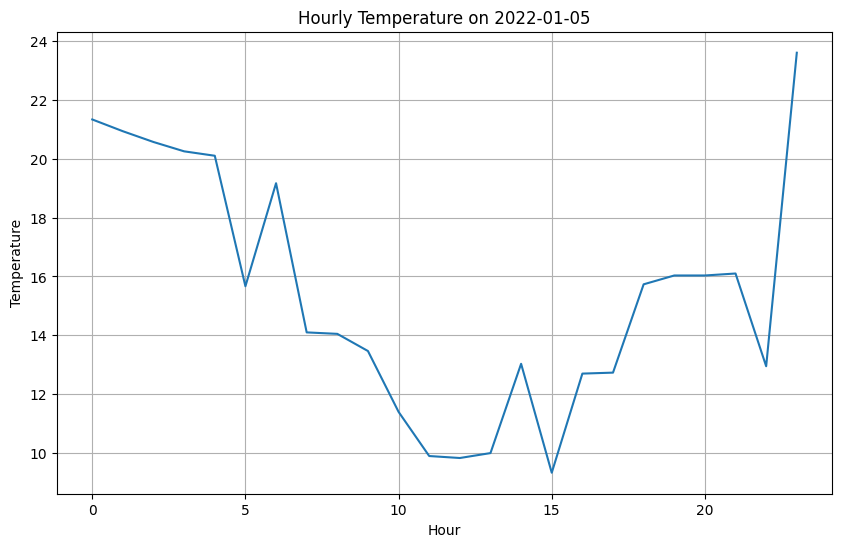

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'filtered_df' is defined and contains the 'Hour' and 'Temperature' columns

plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Hour'], filtered_df['Temperature'])
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.title('Hourly Temperature on 2022-01-05')
plt.grid(True)
plt.show()


# Model Training
- **Input/Output:** 'Hour' as input, 'Temperature' as output.  
- **Data Split:** 70% training, 15% validation, 15% test.  
- **Normalization:** Scale 'Hour' values to 0–1.  
- **Model:** Neural network with two hidden layers (16 neurons each) and an output layer.  
- **Compilation:** Use the Adam optimizer and MSE loss.  
- **Training:** Run for 200 epochs with training and validation sets.  
- **Visualization:** Plot training and validation loss curves.  
- **Evaluation:** Assess performance on the test set using MSE.

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert Datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Hour'] = df['Datetime'].dt.hour

# Our feature is 'Hour' and target is 'Temperature'
X = df['Hour'].values.reshape(-1, 1).astype('float32')
y = df['Temperature'].values.astype('float32')

# Normalize the hour value (0-23) to [0, 1]
X = X / 23.0

# Split the data: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")


Train size: 470, Validation size: 101, Test size: 101


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a simple non-linear model
model = Sequential([
    Dense(16, activation='relu', input_shape=(1,)),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer: predicted temperature
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model using training data and validate on the validation set
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), verbose=1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 389.4259 - val_loss: 356.4332
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 371.6925 - val_loss: 352.3333
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 364.0601 - val_loss: 347.4406
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 365.9875 - val_loss: 341.5037
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 357.1718 - val_loss: 333.6605
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 339.1611 - val_loss: 324.4053
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 334.5500 - val_loss: 314.1841
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 316.5072 - val_loss: 302.6961
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 315.6830 - val_loss: 289.2154
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 305.1580 - val_loss: 273.6141
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 287.9853 - val_loss: 255.5708
Epoch 12/200
15

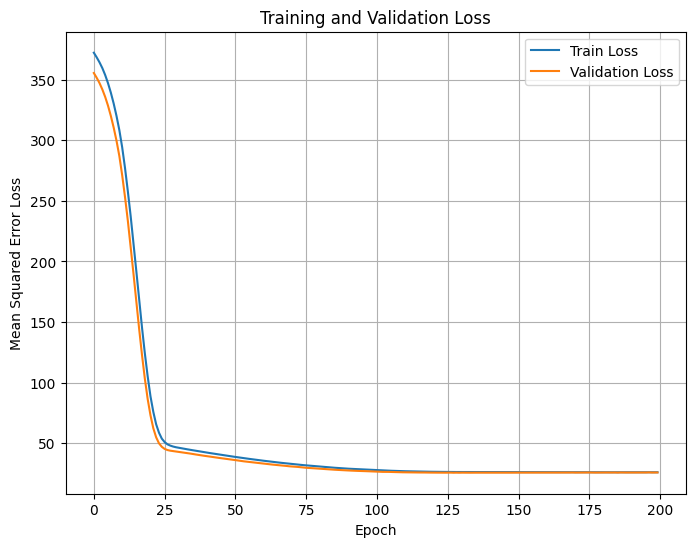

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE Loss: {test_loss:.4f}")

Test MSE Loss: 31.3153


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


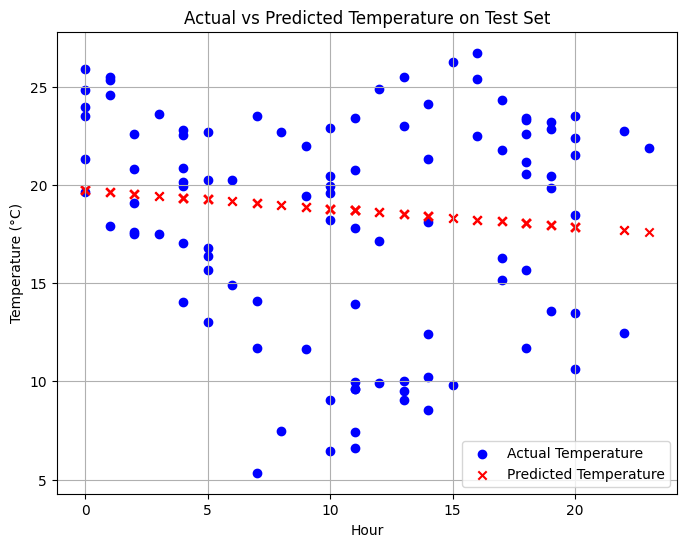

In [12]:
# Predict temperature on test set
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
# Multiply X back to hour scale (0-23) for better visualization
plt.scatter(X_test * 23, y_test, label="Actual Temperature", color="blue", marker="o")
plt.scatter(X_test * 23, y_pred, label="Predicted Temperature", color="red", marker="x")
plt.xlabel("Hour")
plt.ylabel("Temperature (°C)")
plt.title("Actual vs Predicted Temperature on Test Set")
plt.legend()
plt.grid(True)
plt.show()

# Convert to Tflite

In [13]:
import tensorflow as tf
import logging
import sys

# Set TensorFlow logging to INFO (or DEBUG for even more details)
tf.get_logger().setLevel('INFO')
logging.getLogger('tensorflow').setLevel(logging.INFO)

# Convert the Keras model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# # Restore stdout so you can print the captured logs
# sys.stdout = sys.__stdout__

# # Print the captured logs
# print("Converter Logs:")
# print(log_stream.getvalue())
# Save the TFLite model to a file
with open("temperature_model.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model saved as temperature_model.tflite")

INFO:tensorflow:Assets written to: /tmp/tmpk_2cwfjy/assets


Saved artifact at '/tmp/tmpk_2cwfjy'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132054418707600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132054418708752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132054418707408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132054418703184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132054418709328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132054418705296: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model saved as temperature_model.tflite


In [14]:
!xxd -i temperature_model.tflite > temperature_model_data.cc

In [18]:
!wget https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/lite/tools/visualize.py -O tflite_visualize.py

--2025-03-20 20:09:37--  https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/lite/tools/visualize.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16805 (16K) [text/plain]
Saving to: ‘tflite_visualize.py’

tflite_visualize.py 100%[===================>]  16.41K  --.-KB/s    in 0.001s  

2025-03-20 20:09:37 (25.8 MB/s) - ‘tflite_visualize.py’ saved [16805/16805]



Visualize the Tensorflow Lite model

In [20]:
!python tflite_visualize.py temperature_model.tflite model_visualization.html

2025-03-20 20:11:15.984998: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742501476.013256    5750 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742501476.021055    5750 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Perform the interference with the given data

In [ ]:
import numpy as np
# Assuming your model is named 'model'
new_data = np.array([10.0, 11.0, 12.0, 13.0, 14.0, 15.0]).reshape(-1, 1)
# Normalize the new data
new_data_normalized = new_data / 23.0

# Predict temperature using the model
predictions = model.predict(new_data_normalized)

print("Predictions for the given hours:")
for i, prediction in enumerate(predictions):
  print(f"Hour {new_data[i][0]}: Predicted Temperature = {prediction[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predictions for the given hours:
Hour 10.0: Predicted Temperature = 18.79839324951172
Hour 11.0: Predicted Temperature = 18.705467224121094
Hour 12.0: Predicted Temperature = 18.612539291381836
Hour 13.0: Predicted Temperature = 18.51961326599121
Hour 14.0: Predicted Temperature = 18.426685333251953
Hour 15.0: Predicted Temperature = 18.333759307861328
